In [21]:
import pandas as pd

In [20]:
columns = ["Name", "Model Idx", "Epoch", "KL", "Rho", "A-norm", "B-norm", "MC", "DeltaPhi", "MSE", "NRMSE" ]

In [33]:
names = ["Gaussian", "Bimodal", "Soft Trimodal", "Edgy Trimodal"]


In [22]:
inital_config_records = [
    ['Initial Config',
    -1,
    0,
    0,
    0.7,
    1,
    0,
    10.993605613708496,
    0.16258728412680232,
    3.7357230861342056e-07,
    0.08904727447355747],


    ['Initial Config',
    -1,
    0,
    0,
    0.7,
    1,
    0,
    10.385001182556152,
    0.04687207470861716,
    1.7946445472681857e-07,
    0.0617195164709991],

    ['Initial Config',
    -1,
    0,
    0,
    0.7,
    1,
    0,
    10.201189041137695,
    0.18020755612441142,
    3.457893236020418e-07,
    0.08567203504124264],

    ['Initial Config',
    -1,
    0,
    0,
    0.7,
    1,
    0,
    10.199549674987793,
    0.41001646564762434,
    2.7247357819965664e-07,
    0.0760493472352882],

    ['Initial Config',
    -1,
    0,
    0,
    0.7,
    1,
    0,
    10.436782836914062,
    0.2436068091216199,
    2.45745544165867e-07,
    0.07222309893771005]
]

In [214]:
init_conditions_df = pd.DataFrame(inital_config_records, columns=columns)

In [215]:
init_conditions_df = init_conditions_df.aggregate({"mean", "std", "var"})

In [137]:
df = pd.read_csv("RESULTS.csv")

In [132]:
df_mean = pd.read_csv("RESULTS.csv").groupby(["Model Idx", "Epoch"]).mean()

In [133]:
df_stds = pd.read_csv("RESULTS.csv").groupby(["Model Idx", "Epoch"]).std()

In [232]:
initial_kl_df = pd.read_csv("INITIAL-KL.csv")

In [236]:
initial_kl_df.columns = ["Model Idx", "mean", "std"]

In [241]:
initial_kl_df = initial_kl_df.drop([0,1])

In [353]:
initial_kl_df["mean"].to_numpy()

array(['0.20411991328001022', '0.47031110227108003', '0.3570757031440735',
       '0.43603508472442626'], dtype=object)

In [363]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_evolution_with_error(attribute_name, initial_means_str, initial_stds_str, palette='Set1', scale_std=1):
    attr_idx = columns.index(attribute_name)

    # Convert string-wrapped floats to actual floats
    initial_means = [float(mean_str) for mean_str in initial_means_str]
    initial_stds = [float(std_str) for std_str in initial_stds_str]

    # Set Seaborn style and color palette
    sns.set(style='whitegrid')
    sns.set_palette(palette)

    # Group the DataFrame by "Model Idx" and "Epoch" and calculate mean and standard deviation
    grouped_df = df.groupby(['Model Idx', 'Epoch'])[attribute_name].agg(['mean', 'std']).reset_index()

    # Create a new DataFrame for epoch 0 with initial values for each model index
    epoch_0_data = {'Model Idx': [], 'Epoch': [], 'mean': [], 'std': []}
    for model_idx in grouped_df['Model Idx'].unique():
        epoch_0_data['Model Idx'].append(model_idx)
        epoch_0_data['Epoch'].append(0)
        epoch_0_data['mean'].append(initial_means[model_idx])
        epoch_0_data['std'].append(initial_stds[model_idx])

    epoch_0_df = pd.DataFrame(epoch_0_data)

    # Concatenate epoch 0 DataFrame with the original grouped DataFrame
    grouped_df = pd.concat([epoch_0_df, grouped_df]).reset_index(drop=True)

    # Create a figure and axis
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)

    # Plot each group separately
    for model_idx, group in grouped_df.groupby('Model Idx'):
        # Plot from epoch 0
        ax.plot(group['Epoch'], group['mean'], label=f'{names[model_idx]}', marker='o')

        # Add shaded area for standard deviation
        ax.fill_between(group['Epoch'], group['mean'] - group['std'] / scale_std,
                        group['mean'] + group['std'] / scale_std, alpha=0.3)

        # Plot error bar for the initial point with the correct color
        initial_color = sns.color_palette(palette)[model_idx]
        ax.errorbar(x=grouped_df['Epoch'].iloc[0], y=initial_means[model_idx],
                    yerr=initial_stds[model_idx] / scale_std,
                    fmt='o', color=initial_color, markersize=8, capsize=5, label='_nolegend_')

    # Set labels and title
    plt.xlabel('Epoch')
    plt.ylabel(columns[attr_idx])

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

# Example usage:
# initial_means_str = ['0.5', '0.7', ...]  # Replace with your actual string-wrapped float values
# initial_stds_str = ['0.1', '0.2', ...]   # Replace with your actual string-wrapped float values
# plot_evolution_with_error('YourAttributeName', initial_means_str, initial_stds_str, palette='viridis')


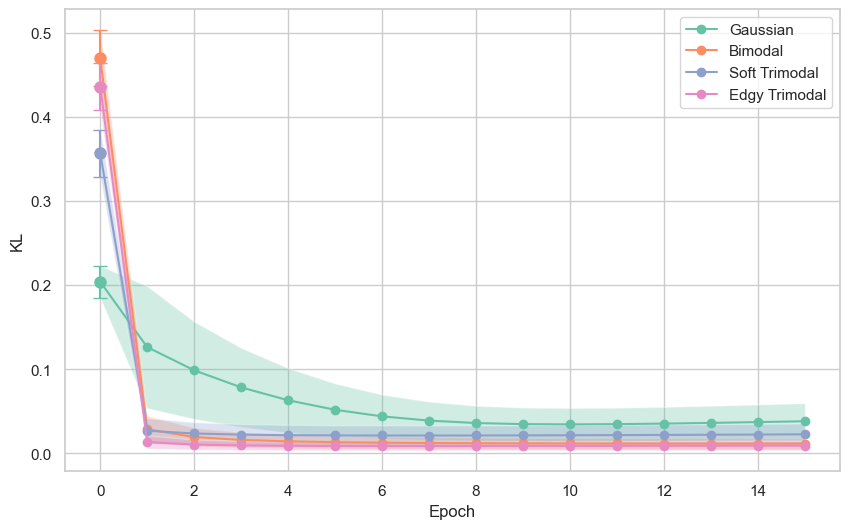

In [364]:
plot_evolution_with_error("KL", initial_kl_df["mean"].to_numpy(), initial_kl_df["std"].to_numpy(), palette="Set2")

In [345]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_evolution_with_given_initial(attribute_name, initial_mean, initial_std, palette='Set1', scale_std=1):
    attr_idx = columns.index(attribute_name)

    # Set Seaborn style and color palette
    sns.set(style='whitegrid')
    sns.set_palette(palette)

    # Group the DataFrame by "Model Idx" and "Epoch" and calculate mean and standard deviation
    grouped_df = df.groupby(['Model Idx', 'Epoch'])[attribute_name].agg(['mean', 'std']).reset_index()

    # Create a new DataFrame for epoch 0 with initial values
    epoch_0_data = {'Model Idx': [], 'Epoch': [], 'mean': [], 'std': []}
    for model_idx in grouped_df['Model Idx'].unique():
        epoch_0_data['Model Idx'].append(model_idx)
        epoch_0_data['Epoch'].append(0)
        epoch_0_data['mean'].append(initial_mean)
        epoch_0_data['std'].append(initial_std)

    epoch_0_df = pd.DataFrame(epoch_0_data)

    # Concatenate epoch 0 DataFrame with the original grouped DataFrame
    grouped_df = pd.concat([epoch_0_df, grouped_df]).reset_index(drop=True)

    # Create a figure and axis
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)

    # Plot each group separately
    for model_idx, group in grouped_df.groupby('Model Idx'):
        # Subtract the initial attribute value from each group of means
        group['mean'] = group['mean'] - group['mean'].iloc[0] + initial_mean

        # Plot from epoch 0
        ax.plot(group['Epoch'], group['mean'], label=f'{names[model_idx]}', marker='o')

        # Add shaded area for standard deviation
        ax.fill_between(group['Epoch'], group['mean'] - group['std'] / scale_std,
                        group['mean'] + group['std'] / scale_std, alpha=0.3)

    # Plot error bar for the initial point
    ax.errorbar(x=grouped_df['Epoch'].iloc[0], y=initial_mean, yerr=initial_std / scale_std,
                fmt='o', color='grey', markersize=8, capsize=5, label='_nolegend_')

    # Set labels and title
    plt.xlabel('Epoch')
    plt.ylabel(columns[attr_idx])

    # Show legend
    #plt.legend()

    # Show the plot
    plt.show()

# Example usage:
# plot_evolution_with_given_initial('Rho', initial_mean, initial_std, palette='viridis')


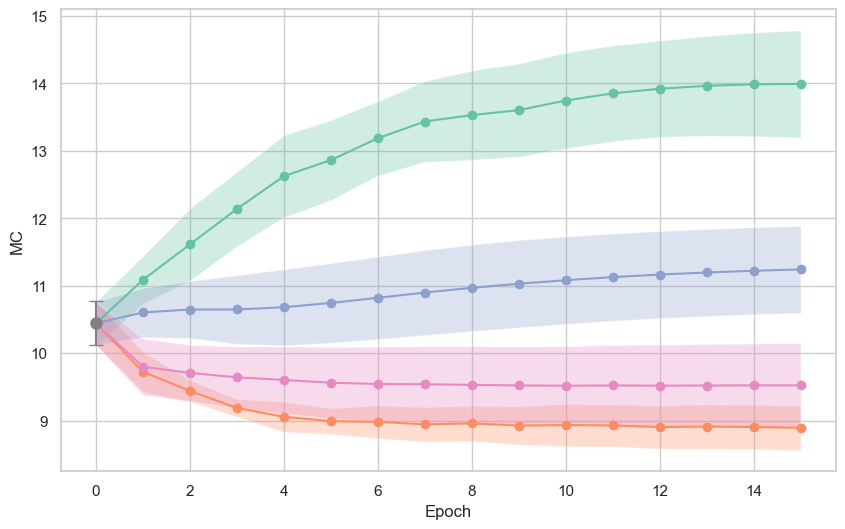

In [346]:
plot_evolution_with_given_initial('MC', init_conditions_df["MC"]['mean'],  init_conditions_df["MC"]['std'], palette='Set2')

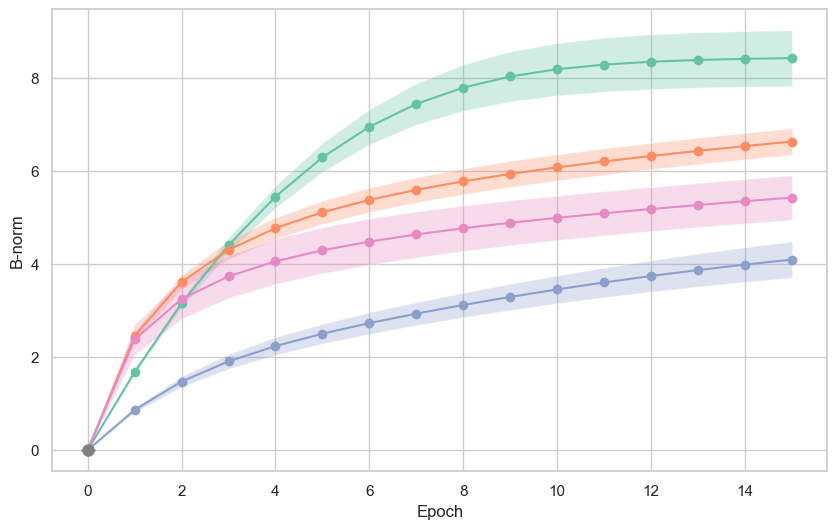

In [347]:
plot_evolution_with_given_initial('B-norm', 0,  0, palette='Set2')

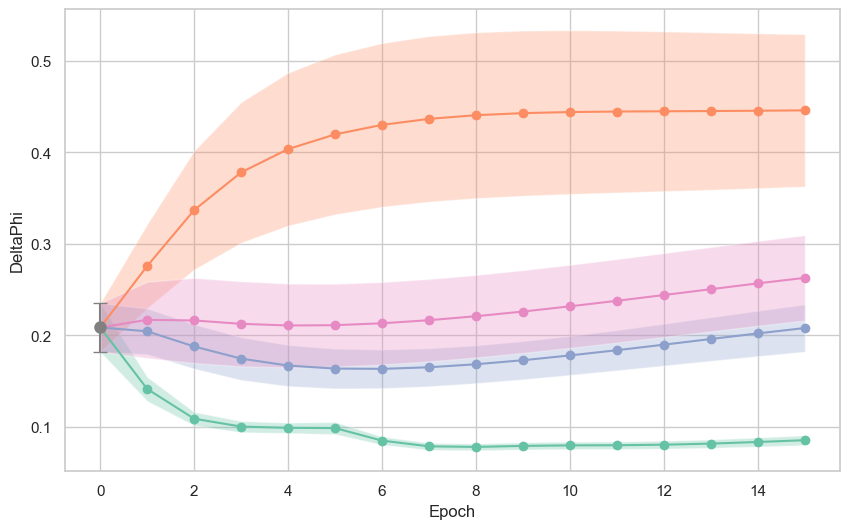

In [348]:
plot_evolution_with_given_initial('DeltaPhi', init_conditions_df["DeltaPhi"]['mean'],  init_conditions_df["DeltaPhi"]['std'], palette='Set2', scale_std=5)
### Scaled by 5